In [2]:
pip install hyppo 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.2/84.2 KB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for hyppo: filename=hyppo-0.3.2-py3-none-any.whl size=134083 sha256=752cd3bd864684c9c4b9c01bf694d404f0acb7a30d7ead2cce001a989f368335
  Stored in directory: /root/.cache/pip/wheels/38/30/06/7261d55378641f76ccc9b8f4e866ddeb40dcb22f6a4b6c9380
Successfully built hyppo


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import random as rnd
import math as math
import pandas as pd
import scipy.stats as stats
from hyppo.ksample import MMD
from sklearn.metrics.pairwise import rbf_kernel

Критерий вида $d(P, Q) = sup_{f\in B_1}(E_H(f(x)-E_Pf(x)) +  sup_{f\in B_1}(E_H(f(x)-E_Qf(x))$, где $H = \frac{n}{n+m}P+\frac{m}{m+n}Q$

Статистика: $T = mmd^2(X_i, Y_j) + mmd^2(X_i, Z_j)$, где X - объединенная выборка Y и Z

In [4]:
def perm_pv(Y, Z, perm_num):
    X = np.concatenate((Y, Z), axis= 0)
    st = MMD().statistic(X.reshape((X.shape[0], 1)), Z.reshape((Z.shape[0], 1))) + MMD().statistic(X.reshape((X.shape[0], 1)), Z.reshape((Z.shape[0], 1)))
    i = 0
    for _ in range(perm_num):
        X = np.random.permutation(X)
        Y = X[:len(Y)]
        Z = X[len(Y):]
        st_new = MMD().statistic(X.reshape((X.shape[0], 1)), Z.reshape((Z.shape[0], 1))) + MMD().statistic(X.reshape((X.shape[0], 1)), Z.reshape((Z.shape[0], 1)))
        if st >= st_new:
            i += 1
    return i/perm_num

def mmd_stat(a1, a2):
   return np.sum(rbf_kernel(a1, a1))/(len(a1) * (len(a1)-1)) + np.sum(rbf_kernel(a2, a2))/(len(a2) * (len(a2)-1)) - 2 * np.sum(rbf_kernel(a1, a2))/(len(a1) * len(a2))

In [5]:
num = [i * 50 for i in range(1, 4)]
N = 30

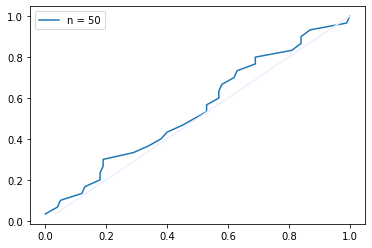

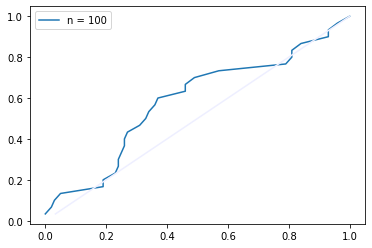

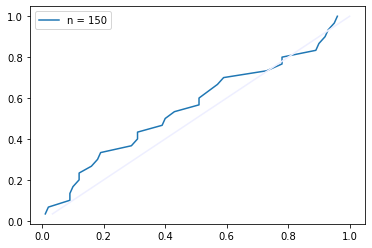

In [157]:
for n in num:
    p_value = []
    for i in range(N):
        Y = stats.norm(0, 1).rvs(n)
        Z = stats.norm(0, 1).rvs(n)
        p_value.append(1 - perm_pv(Y, Z, 100))
    plt.plot(sorted(p_value), [(i + 1) / N for i in range(N)], label = 'n = ' + str(n))
    plt.legend()
    plt.plot([(i + 1) / N for i in range(N)], [(i + 1) / N for i in range(N)], color = '#eeefff')
    plt.show()

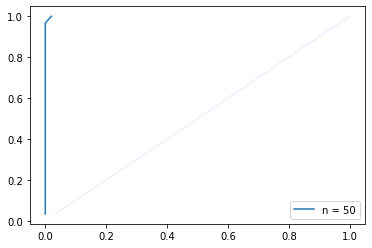

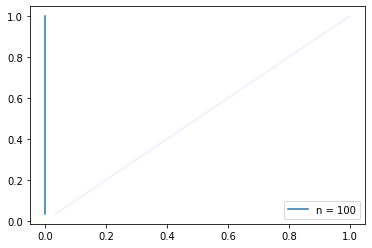

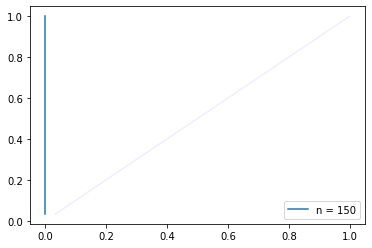

In [158]:
for n in num:
    p_value = []
    for i in range(N):
        Y = stats.norm(1, 2).rvs(n)
        Z = stats.norm(0, 1).rvs(n)
        p_value.append(1 - perm_pv(Y, Z, 100))
    plt.plot(sorted(p_value), [(i + 1) / N for i in range(N)], label = 'n = ' + str(n))
    plt.legend()
    plt.plot([(i + 1) / N for i in range(N)], [(i + 1) / N for i in range(N)], color = '#eeefff')
    plt.show()

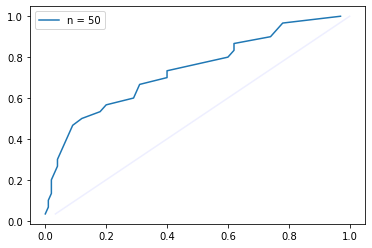

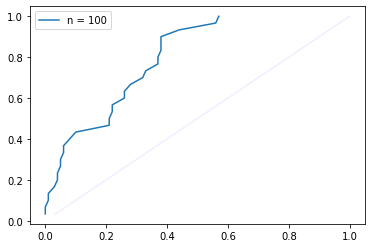

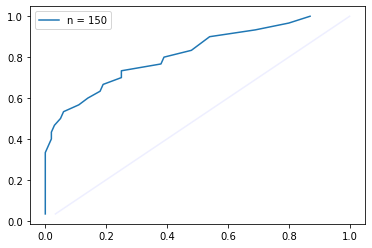

In [171]:
for n in num:
    p_value = []
    for i in range(N):
        Y = stats.norm(loc=0, scale=np.sqrt(2)).rvs(n)
        Z = stats.laplace.rvs(size = n)
        p_value.append(1 - perm_pv(Y, Z, 100))
    plt.plot(sorted(p_value), [(i + 1) / N for i in range(N)], label = 'n = ' + str(n))
    plt.legend()
    plt.plot([(i + 1) / N for i in range(N)], [(i + 1) / N for i in range(N)], color = '#eeefff')
    plt.show()

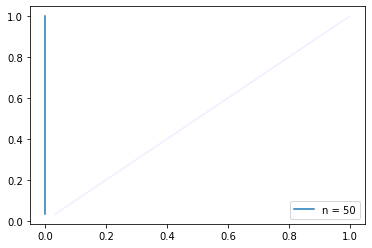

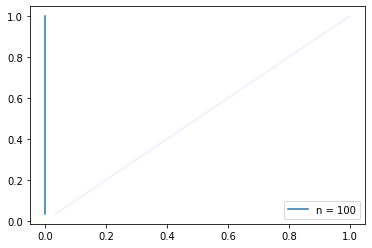

KeyboardInterrupt: ignored

In [172]:
for n in num:
    p_value = []
    for i in range(N):
        Y = stats.norm(3, 2).rvs(n)
        Z = stats.norm(0, 1).rvs(n)
        p_value.append(1 - perm_pv(Y, Z, 500))
    plt.plot(sorted(p_value), [(i + 1) / N for i in range(N)], label = 'n = ' + str(n))
    plt.legend()
    plt.plot([(i + 1) / N for i in range(N)], [(i + 1) / N for i in range(N)], color = '#eeefff')
    plt.show()

n = 50


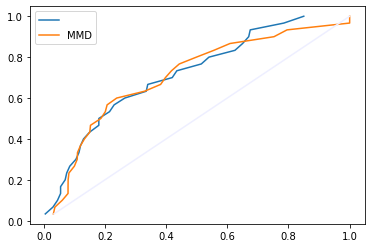

n = 100


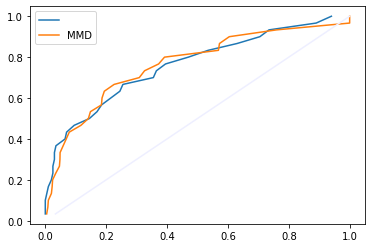

n = 150


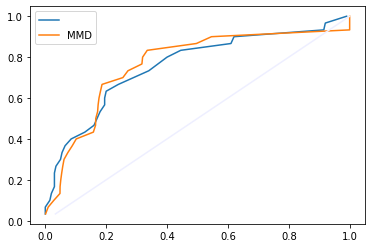

In [174]:
for n in num:
    print('n = '+str(n))
    p_value = []
    mmd_pv = []
    for i in range(N):
        Y = stats.norm(loc=0, scale=np.sqrt(2)).rvs(n)
        Z = stats.laplace.rvs(size = n)
        mmd_pv.append(MMD().test(Y, Z)[1])
        p_value.append(1 - perm_pv(Y, Z, 200))
    plt.plot(sorted(p_value), [(i + 1) / N for i in range(N)], label = ' ')
    plt.plot(sorted(mmd_pv), [(i + 1) / N for i in range(N)], label = 'MMD')
    plt.legend()
    plt.plot([(i + 1) / N for i in range(N)], [(i + 1) / N for i in range(N)], color = '#eeefff')
    plt.show()

In [6]:
def perm_pv_3(Y, Z, W, perm_num):
    X = np.concatenate((Y, Z, W), axis= 0)
    st = MMD().statistic(X.reshape((X.shape[0], 1)), Y.reshape((Y.shape[0], 1))) + MMD().statistic(X.reshape((X.shape[0], 1)), Z.reshape((Z.shape[0], 1))) + MMD().statistic(X.reshape((X.shape[0], 1)), W.reshape((W.shape[0], 1)))
    i = 0
    for _ in range(perm_num):
        X = np.random.permutation(X)
        Y = X[:len(Y)]
        Z = X[len(Y):len(Z)]
        W = X[len(Z):]
        st_new = MMD().statistic(X.reshape((X.shape[0], 1)), Y.reshape((Y.shape[0], 1))) + MMD().statistic(X.reshape((X.shape[0], 1)), Z.reshape((Z.shape[0], 1))) + MMD().statistic(X.reshape((X.shape[0], 1)), W.reshape((W.shape[0], 1)))
        if st >= st_new:
            i += 1
    return i/perm_num


n = 50


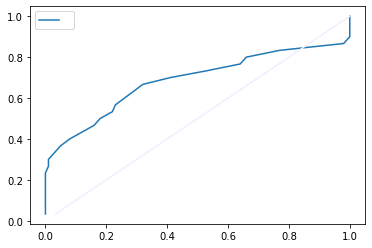

n = 100


KeyboardInterrupt: 

In [8]:
for n in num:
    print('n = '+str(n))
    p_value = []
    mmd_pv = []
    for i in range(N):
        Y = stats.expon.rvs(size=n)
        Z = stats.expon.rvs(size=n)
        W = stats.expon.rvs(scale=1/1.2, size=n)
        p_value.append(1 -perm_pv_3(Y, Z, W, 100))
    plt.plot(sorted(p_value), [(i + 1) / N for i in range(N)], label = ' ')
    plt.legend()
    plt.plot([(i + 1) / N for i in range(N)], [(i + 1) / N for i in range(N)], color = '#eeefff')
    plt.show()

n = 50


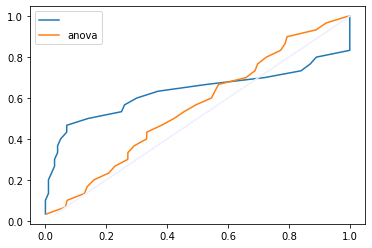

n = 100


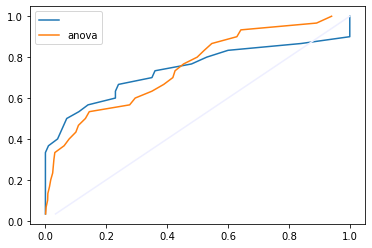

n = 150


In [ ]:
for n in num:
    print('n = '+str(n))
    p_value = []
    anova_pv = []
    for i in range(N):
        Y = stats.expon.rvs(size=n)
        Z = stats.expon.rvs(size=n)
        W = stats.expon.rvs(scale=1/1.2, size=n)
        p_value.append(1 -perm_pv_3(Y, Z, W, 100))
        anova_pv.append(stats.f_oneway(Y, Z, W)[1])
    plt.plot(sorted(p_value), [(i + 1) / N for i in range(N)], label = ' ')
    plt.plot(sorted(anova_pv), [(i + 1) / N for i in range(N)], label = 'anova')
    plt.legend()
    plt.plot([(i + 1) / N for i in range(N)], [(i + 1) / N for i in range(N)], color = '#eeefff')
    plt.show()

In [ ]:
pv_anova = [stats.f_oneway(x, y, z)[1] for x, y, z in zip(X, Y, Z)]
pv_anova.sort()
pv_kw = [stats.kruskal(x, y, z)[1] for x, y, z in zip(X, Y, Z)]
pv_kw.sort()
plt.plot(pv_anova, [i / 99 for i in range(100)], label = 'ANOVA')